In [5]:
import os
import re
import imageio
from PIL import Image 
import numpy as np
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import split_folders

In [3]:
root_path = '../input/'

folders = ['NORMAL', 'PNEUMONIA','BACTERIA_PNEUMONIA', 'VIRUS_PNEUMONIA']

for folder in folders:
    if not os.path.exists(os.path.join(root_path,str(folder))):
                          os.mkdir(os.path.join(root_path,str(folder)))

In [4]:
rootdir = '../input/PNEUMONIA/'
f = [f for f in os.listdir(rootdir)]
b = 'bacteria'
v = 'virus'

In [5]:
for f in os.listdir(rootdir):
    if b in f:
        imgname = f
        path = os.path.join(rootdir,imgname)
        savename = '../input/BACTERIA_PNEUMONIA/'+imgname
        image_data = np.array(Image.open(path))
        imageio.imwrite(savename,image_data)
    elif v in f:
        imgname = f
        path = os.path.join(rootdir,imgname)
        savename = '../input/VIRUS_PNEUMONIA/'+imgname
        image_data = np.array(Image.open(path))
        imageio.imwrite(savename,image_data)

## Split the images into train test and validation 

In [2]:
labeled_input = '../labeled_input/'

if not os.path.exists(labeled_input):
    os.mkdir(labeled_input)

split_folders.ratio('../input/', output="../labeled_input/", seed=1337, ratio=(.8, .1, .1)) 

Copying files: 5856 files [01:59, 49.03 files/s]


## Creating the classifier 

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('../labeled_input/train/',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('../labeled_input/val/',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 4684 images belonging to 3 classes.
Found 585 images belonging to 3 classes.


In [116]:
classifier = Sequential()

# Convolution - extracting appropriate features from the input image.
# Non-Linearity (RELU) - replacing all negative pixel values in feature map by zero.

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3),
               activation='relu'))

# Pooling: reduces dimensionality of the feature maps but keeps the most important information.

classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer and flattening in order to arrange 3D volumes into a 1D vector.

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

# Fully connected layers: ensures connections to all activations in the previous layer.

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=3, activation='softmax'))

In [117]:
# Compile the CNN and train the classifier..
classifier.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [118]:
chest_model= classifier.fit_generator(train_generator, steps_per_epoch=30, epochs=10,
                         validation_data=validation_generator,
                         validation_steps=30)

Epoch 1/10
30/30 [==============================] - ETA: 38s - loss: 1.1480 - accuracy: 0.125 - ETA: 27s - loss: 1.1666 - accuracy: 0.234 - ETA: 25s - loss: 1.1320 - accuracy: 0.281 - ETA: 22s - loss: 1.1287 - accuracy: 0.320 - ETA: 21s - loss: 1.1263 - accuracy: 0.325 - ETA: 20s - loss: 1.1179 - accuracy: 0.333 - ETA: 18s - loss: 1.1128 - accuracy: 0.343 - ETA: 17s - loss: 1.1045 - accuracy: 0.375 - ETA: 17s - loss: 1.1037 - accuracy: 0.381 - ETA: 16s - loss: 1.1027 - accuracy: 0.378 - ETA: 15s - loss: 1.1025 - accuracy: 0.375 - ETA: 13s - loss: 1.1007 - accuracy: 0.380 - ETA: 12s - loss: 1.0979 - accuracy: 0.387 - ETA: 12s - loss: 1.0975 - accuracy: 0.395 - ETA: 11s - loss: 1.0968 - accuracy: 0.397 - ETA: 10s - loss: 1.0958 - accuracy: 0.394 - ETA: 9s - loss: 1.0953 - accuracy: 0.397 - ETA: 8s - loss: 1.0940 - accuracy: 0.39 - ETA: 8s - loss: 1.0929 - accuracy: 0.40 - ETA: 7s - loss: 1.0910 - accuracy: 0.41 - ETA: 6s - loss: 1.0878 - accuracy: 0.42 - ETA: 5s - loss: 1.0841 - accuracy

Epoch 7/10
30/30 [==============================] - ETA: 5s - loss: 0.8572 - accuracy: 0.65 - ETA: 4s - loss: 0.7478 - accuracy: 0.70 - ETA: 4s - loss: 0.6915 - accuracy: 0.73 - ETA: 4s - loss: 0.6994 - accuracy: 0.71 - ETA: 4s - loss: 0.6717 - accuracy: 0.72 - ETA: 4s - loss: 0.6763 - accuracy: 0.73 - ETA: 3s - loss: 0.6842 - accuracy: 0.73 - ETA: 3s - loss: 0.7059 - accuracy: 0.71 - ETA: 3s - loss: 0.7114 - accuracy: 0.70 - ETA: 3s - loss: 0.7052 - accuracy: 0.70 - ETA: 3s - loss: 0.6941 - accuracy: 0.71 - ETA: 3s - loss: 0.7021 - accuracy: 0.71 - ETA: 3s - loss: 0.7179 - accuracy: 0.70 - ETA: 4s - loss: 0.7106 - accuracy: 0.70 - ETA: 4s - loss: 0.7057 - accuracy: 0.71 - ETA: 4s - loss: 0.7061 - accuracy: 0.70 - ETA: 4s - loss: 0.7083 - accuracy: 0.70 - ETA: 4s - loss: 0.7100 - accuracy: 0.71 - ETA: 4s - loss: 0.7041 - accuracy: 0.71 - ETA: 4s - loss: 0.7043 - accuracy: 0.71 - ETA: 3s - loss: 0.7058 - accuracy: 0.71 - ETA: 3s - loss: 0.7159 - accuracy: 0.70 - ETA: 3s - loss: 0.7188 -

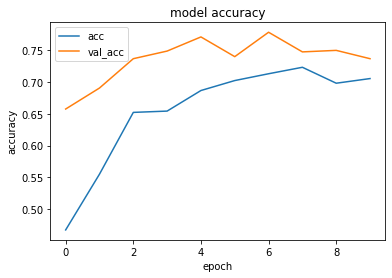

In [127]:
# Accuracy
plt.plot(chest_model.history['accuracy'])
plt.plot(chest_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [19]:
train_generator.class_indices

{'BACTERIA_PNEUMONIA': 0, 'NORMAL': 1, 'VIRUS_PNEUMONIA': 2}

In [71]:
test_image = image.load_img('../labeled_input/test/BACTERIA_PNEUMONIA/person1043_bacteria_2977.jpeg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = chest_model.model.predict(test_image)

C:\Users\aakas\AppData\Roaming\Python\Python37\site-packages\keras\engine\sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [72]:
print(result[0][0])
print(result[0][1])
print(result[0][2])

1.0
0.0
0.0


In [137]:
classifier.save('../models/chest_model.h5')

In [3]:
from keras.models import load_model
chest_model = load_model('../models/chest_model.h5')

In [30]:
# Trainable attribute set to False in order to freeze the convolutional base - this is done to prevent weights from updating during training.

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64,64,3))

conv_base.trainable=False

58892288/58889256 [==============================] - ETA: 35 - ETA: 5: - ETA: 4: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 49s - ETA: 41 - ETA: 37 - ETA: 32 - ETA: 28 - ETA: 28 - ETA: 33 - ETA: 31 - ETA: 24 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 17 - ETA: 17 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 15 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA

In [35]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [36]:
chest_model_vgg16 = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/30
30/30 [==============================] - ETA: 58s - loss: 1.2623 - accuracy: 0.437 - ETA: 46s - loss: 1.2727 - accuracy: 0.406 - ETA: 43s - loss: 1.2028 - accuracy: 0.427 - ETA: 42s - loss: 1.1508 - accuracy: 0.460 - ETA: 39s - loss: 1.1439 - accuracy: 0.468 - ETA: 37s - loss: 1.1222 - accuracy: 0.479 - ETA: 35s - loss: 1.1304 - accuracy: 0.468 - ETA: 33s - loss: 1.1275 - accuracy: 0.472 - ETA: 32s - loss: 1.1124 - accuracy: 0.482 - ETA: 30s - loss: 1.0840 - accuracy: 0.493 - ETA: 28s - loss: 1.0490 - accuracy: 0.517 - ETA: 27s - loss: 1.0305 - accuracy: 0.528 - ETA: 25s - loss: 1.0315 - accuracy: 0.531 - ETA: 24s - loss: 1.0531 - accuracy: 0.524 - ETA: 22s - loss: 1.0535 - accuracy: 0.522 - ETA: 21s - loss: 1.0424 - accuracy: 0.523 - ETA: 19s - loss: 1.0355 - accuracy: 0.520 - ETA: 18s - loss: 1.0216 - accuracy: 0.527 - ETA: 16s - loss: 1.0055 - accuracy: 0.537 - ETA: 14s - loss: 0.9916 - accuracy: 0.545 - ETA: 13s - loss: 0.9813 - accuracy: 0.550 - ETA: 11s - loss: 0.9802 

30/30 [==============================] - ETA: 1:03 - loss: 0.7614 - accuracy: 0.68 - ETA: 58s - loss: 0.6822 - accuracy: 0.7188 - ETA: 52s - loss: 0.6814 - accuracy: 0.718 - ETA: 49s - loss: 0.6964 - accuracy: 0.703 - ETA: 47s - loss: 0.7237 - accuracy: 0.681 - ETA: 46s - loss: 0.7283 - accuracy: 0.697 - ETA: 44s - loss: 0.7091 - accuracy: 0.705 - ETA: 42s - loss: 0.7016 - accuracy: 0.710 - ETA: 39s - loss: 0.6884 - accuracy: 0.718 - ETA: 37s - loss: 0.6985 - accuracy: 0.712 - ETA: 36s - loss: 0.7196 - accuracy: 0.698 - ETA: 34s - loss: 0.7251 - accuracy: 0.690 - ETA: 32s - loss: 0.7201 - accuracy: 0.694 - ETA: 29s - loss: 0.7143 - accuracy: 0.698 - ETA: 28s - loss: 0.7229 - accuracy: 0.695 - ETA: 26s - loss: 0.7158 - accuracy: 0.701 - ETA: 24s - loss: 0.7121 - accuracy: 0.702 - ETA: 22s - loss: 0.7168 - accuracy: 0.701 - ETA: 20s - loss: 0.7164 - accuracy: 0.702 - ETA: 18s - loss: 0.7100 - accuracy: 0.706 - ETA: 16s - loss: 0.7044 - accuracy: 0.709 - ETA: 15s - loss: 0.7035 - accuracy

30/30 [==============================] - ETA: 1:01 - loss: 0.5235 - accuracy: 0.75 - ETA: 57s - loss: 0.6816 - accuracy: 0.7031 - ETA: 55s - loss: 0.7196 - accuracy: 0.729 - ETA: 53s - loss: 0.7458 - accuracy: 0.726 - ETA: 51s - loss: 0.7233 - accuracy: 0.718 - ETA: 47s - loss: 0.7115 - accuracy: 0.718 - ETA: 45s - loss: 0.7136 - accuracy: 0.709 - ETA: 42s - loss: 0.7084 - accuracy: 0.714 - ETA: 40s - loss: 0.7164 - accuracy: 0.718 - ETA: 38s - loss: 0.7007 - accuracy: 0.721 - ETA: 36s - loss: 0.6799 - accuracy: 0.735 - ETA: 34s - loss: 0.6756 - accuracy: 0.731 - ETA: 32s - loss: 0.6727 - accuracy: 0.730 - ETA: 30s - loss: 0.6701 - accuracy: 0.732 - ETA: 28s - loss: 0.6655 - accuracy: 0.733 - ETA: 26s - loss: 0.6708 - accuracy: 0.726 - ETA: 24s - loss: 0.6672 - accuracy: 0.726 - ETA: 22s - loss: 0.6685 - accuracy: 0.727 - ETA: 20s - loss: 0.6731 - accuracy: 0.723 - ETA: 18s - loss: 0.6596 - accuracy: 0.731 - ETA: 17s - loss: 0.6515 - accuracy: 0.736 - ETA: 15s - loss: 0.6486 - accuracy

30/30 [==============================] - ETA: 58s - loss: 0.5637 - accuracy: 0.812 - ETA: 58s - loss: 0.5666 - accuracy: 0.796 - ETA: 57s - loss: 0.6630 - accuracy: 0.718 - ETA: 54s - loss: 0.6841 - accuracy: 0.710 - ETA: 52s - loss: 0.6685 - accuracy: 0.718 - ETA: 49s - loss: 0.6999 - accuracy: 0.713 - ETA: 47s - loss: 0.6753 - accuracy: 0.727 - ETA: 45s - loss: 0.6846 - accuracy: 0.722 - ETA: 43s - loss: 0.7150 - accuracy: 0.715 - ETA: 40s - loss: 0.7101 - accuracy: 0.725 - ETA: 37s - loss: 0.6855 - accuracy: 0.733 - ETA: 35s - loss: 0.6870 - accuracy: 0.731 - ETA: 33s - loss: 0.7021 - accuracy: 0.723 - ETA: 31s - loss: 0.7026 - accuracy: 0.723 - ETA: 29s - loss: 0.7080 - accuracy: 0.716 - ETA: 27s - loss: 0.6954 - accuracy: 0.722 - ETA: 25s - loss: 0.6975 - accuracy: 0.716 - ETA: 23s - loss: 0.7027 - accuracy: 0.711 - ETA: 21s - loss: 0.6882 - accuracy: 0.715 - ETA: 19s - loss: 0.6885 - accuracy: 0.718 - ETA: 17s - loss: 0.6838 - accuracy: 0.715 - ETA: 15s - loss: 0.6758 - accuracy:

30/30 [==============================] - ETA: 33s - loss: 0.7763 - accuracy: 0.656 - ETA: 32s - loss: 0.6618 - accuracy: 0.671 - ETA: 31s - loss: 0.6843 - accuracy: 0.656 - ETA: 29s - loss: 0.7059 - accuracy: 0.656 - ETA: 28s - loss: 0.7041 - accuracy: 0.656 - ETA: 26s - loss: 0.6934 - accuracy: 0.666 - ETA: 25s - loss: 0.6616 - accuracy: 0.692 - ETA: 24s - loss: 0.6503 - accuracy: 0.699 - ETA: 23s - loss: 0.6621 - accuracy: 0.701 - ETA: 21s - loss: 0.6707 - accuracy: 0.690 - ETA: 20s - loss: 0.6782 - accuracy: 0.696 - ETA: 19s - loss: 0.6637 - accuracy: 0.697 - ETA: 17s - loss: 0.6600 - accuracy: 0.697 - ETA: 16s - loss: 0.6682 - accuracy: 0.689 - ETA: 15s - loss: 0.6591 - accuracy: 0.695 - ETA: 14s - loss: 0.6643 - accuracy: 0.689 - ETA: 13s - loss: 0.6631 - accuracy: 0.691 - ETA: 12s - loss: 0.6572 - accuracy: 0.696 - ETA: 11s - loss: 0.6609 - accuracy: 0.699 - ETA: 10s - loss: 0.6651 - accuracy: 0.700 - ETA: 9s - loss: 0.6652 - accuracy: 0.705 - ETA: 8s - loss: 0.6769 - accuracy: 0

30/30 [==============================] - ETA: 32s - loss: 0.6337 - accuracy: 0.812 - ETA: 31s - loss: 0.5915 - accuracy: 0.750 - ETA: 30s - loss: 0.6158 - accuracy: 0.739 - ETA: 28s - loss: 0.6231 - accuracy: 0.726 - ETA: 27s - loss: 0.6587 - accuracy: 0.706 - ETA: 26s - loss: 0.6500 - accuracy: 0.703 - ETA: 24s - loss: 0.6359 - accuracy: 0.709 - ETA: 23s - loss: 0.6361 - accuracy: 0.718 - ETA: 22s - loss: 0.6503 - accuracy: 0.715 - ETA: 22s - loss: 0.6485 - accuracy: 0.706 - ETA: 20s - loss: 0.6477 - accuracy: 0.713 - ETA: 19s - loss: 0.6553 - accuracy: 0.713 - ETA: 18s - loss: 0.6531 - accuracy: 0.711 - ETA: 16s - loss: 0.6436 - accuracy: 0.718 - ETA: 15s - loss: 0.6530 - accuracy: 0.714 - ETA: 14s - loss: 0.6557 - accuracy: 0.716 - ETA: 13s - loss: 0.6561 - accuracy: 0.718 - ETA: 12s - loss: 0.6490 - accuracy: 0.724 - ETA: 11s - loss: 0.6441 - accuracy: 0.728 - ETA: 10s - loss: 0.6511 - accuracy: 0.725 - ETA: 9s - loss: 0.6558 - accuracy: 0.721 - ETA: 8s - loss: 0.6544 - accuracy: 0

In [39]:
model.save('chest_model_vgg16.h5')

In [75]:
test_image = image.load_img('../labeled_input/test/BACTERIA_PNEUMONIA/person1053_bacteria_2987.jpeg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = chest_model_vgg16.model.predict(test_image)

In [86]:
if np.argmax(result)==0:
    prediction='Bacteria Pneumonia'
elif np.argmax(result)==1:
    prediction='Normal'
else:
    prediction='Virus Pneumonia'
    
print(prediction)

Bacteria Pneumonia


In [53]:
train_generator.class_indices

{'BACTERIA_PNEUMONIA': 0, 'NORMAL': 1, 'VIRUS_PNEUMONIA': 2}

In [76]:
print(result[0][0])
print(result[0][1])
print(result[0][2])

0.9995857
0.0
0.00041429378


In [84]:
result.max()

0.9995857

0